In [1]:
from Utilities.ExpModels import ArchModel
import numpy as np
from scipy.integrate import quad, dblquad

In [2]:
model = ArchModel(-1,1, 0,1) 
theta1 = 0.3
theta2 = 0.3
x = model.GeneratorThetaGiven([theta1,theta2],1)[0]

In [3]:
def ret_e(theta1,x):
    Q = np.identity(100)
    R = np.identity(99)*(-theta1)
    Q[1:,:-1] = Q[1:,:-1] + R
    x = x.reshape(100,1)
    e = np.dot(Q,x).reshape(100)
    return e

def val1(a,b,theta2):
    return np.exp(-np.power(b,2)/(2*(0.2+theta2*np.power(a,2))))/np.sqrt(2*np.pi*(0.2+theta2*np.power(a,2)))

def val2(a):
    return np.exp(-np.power(a,2)/2)/np.sqrt(2*np.pi)

def p1_integrand(a,b,theta2):
    return np.exp(val1(a,b,theta2) * val2(a))

def p1(b,theta2):
    return quad(p1_integrand,-np.inf,np.inf,args = (b,theta2))[0]

def Log_prod_term(e,theta2):
    prod = 0
    for i in range(1,100):
        prod = prod + Log_val1(e[i-1],e[i],theta2)
    return prod

def probability(theta1,theta2):
    e = ret_e(theta1,x)
    print(Log_p1(e[0],theta2),' ',Log_prod_term(e,theta2))
    return np.exp(Log_p1(e[0],theta2) + Log_prod_term(e,theta2))

def Lognumerator(theta1,theta2,x):
    return np.log(probability(theta1,theta2))

def Logdenominator(x):
    return np.log(dblquad(probability,-1,1,lambda q: 0,lambda q: 1)[0])

def true_probability(theta1,theta2,x):
    return np.exp(Lognumerator(theta1,theta2,x) - Logdenominator(x))

In [4]:
probability(theta1,theta2)

NameError: name 'Log_p1' is not defined

In [5]:
Logtrue_probability(theta1,theta2,x)

NameError: name 'Logtrue_probability' is not defined

In [6]:
np.log(0)

/home/amrit/miniconda3/envs/kernelsProject/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [7]:
x.shape

(100,)

In [4]:
import pickle
with open('observedData.pickle', 'rb') as f:
     (generatingParameters,obsData) = pickle.load(f)

In [7]:
x = obsData[0]
n1=10
n2=10
theta1_values=np.linspace(-0.90,0.90 , n1)
theta2_values=np.linspace( 0.1, 0.9 , n2)
xv,yv = np.meshgrid(theta1_values,theta2_values)
theta_vals = np.dstack((xv,yv))
theta_values = theta_vals.reshape(n1*n2,2)

from Utilities.ExpModels import  ArchModel, ARCH_TP
obj = ARCH_TP()
true_posterior = obj.truePosterior(x*10,theta_values)

KeyboardInterrupt: 

In [ ]:
obj.visualize(xv,yv,true_posterior)

In [5]:
with open('estimated_probabilitiesH1.pickle', 'rb') as f:
     estimated_probabilities  = pickle.load(f)

(probabilities,classifiers_test_scores) = estimated_probabilities
probabilities = np.swapaxes(probabilities,0,1)
p1 = probabilities[0]

with open('estimated_probabilitiesH2.pickle', 'rb') as f:
     estimated_probabilities  = pickle.load(f)

(probabilities,classifiers_test_scores) = estimated_probabilities
probabilities = np.swapaxes(probabilities,0,1)
p1 = np.hstack([p1,probabilities[0]])

with open('estimated_probabilitiesH3.pickle', 'rb') as f:
     estimated_probabilities  = pickle.load(f)

(probabilities,classifiers_test_scores) = estimated_probabilities
probabilities = np.swapaxes(probabilities,0,1)
p1 = np.hstack([p1,probabilities[0]])

with open('estimated_probabilitiesH4.pickle', 'rb') as f:
     estimated_probabilities  = pickle.load(f)

(probabilities,classifiers_test_scores) = estimated_probabilities
probabilities = np.swapaxes(probabilities,0,1)
p1 = np.hstack([p1,probabilities[0]])

with open('estimated_probabilitiesH5.pickle', 'rb') as f:
     estimated_probabilities  = pickle.load(f)

(probabilities,classifiers_test_scores) = estimated_probabilities
probabilities = np.swapaxes(probabilities,0,1)
p1 = np.hstack([p1,probabilities[0]])


In [9]:
p1.shape

(100, 100)

In [10]:
classifiers_test_scores.shape

(20, 1)

In [11]:
x = p1[0] 
n1=10
n2=10
theta1_values=np.linspace(-0.90,0.90 , n1)
theta2_values=np.linspace( 0.1, 0.9 , n2)
xv,yv = np.meshgrid(theta1_values,theta2_values)
theta_vals = np.dstack((xv,yv))
theta_values = theta_vals.reshape(n1*n2,2)

from Utilities.ExpModels import  ArchModel, ARCH_TP
obj = ARCH_TP()

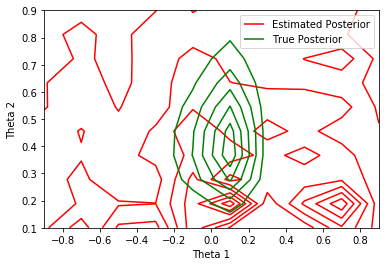

In [35]:
import matplotlib.pyplot as plt

def visualize(theta1,theta2,post1,post2):
    #theta1 is xv from meshgrid
    #theta2 is yv from meshgrid
    fig = plt.figure()
    plt.clf()
    postReshape1 = post1.reshape(theta1.shape)
    postReshape2 = post2.reshape(theta1.shape)
    c1 = plt.contour(theta1, theta2, postReshape1,colors='red')
    c2 = plt.contour(theta1, theta2, postReshape2,colors='green')
    #plt.clabel(CS, inline=1, fontsize=10)
    proxy =[c1,c2]
  #  plt.title('Arch True Posterior')
    c1.collections[0].set_label('Estimated Posterior')
    c2.collections[1].set_label('True Posterior')
    plt.legend()
    plt.xlabel('Theta 1')
    plt.ylabel('Theta 2')
    plt.show()
    fig.savefig('RBF_Contor.pdf')
        
visualize(xv,yv,p1[8],tp[8])



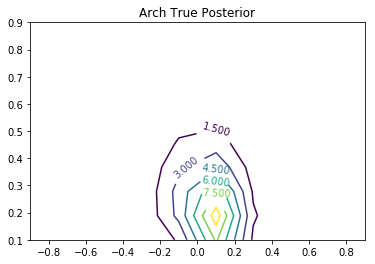

In [61]:
obj.visualize(xv,yv,tp[6])

In [6]:
tp =np.load('TruePosterior.npy')

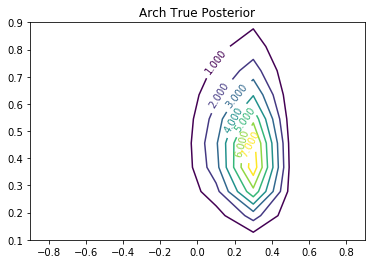

In [6]:
from Utilities.ExpModels import  ArchModel, ARCH_TP
n1=10
n2=10
theta1_values=np.linspace(-0.90,0.90 , n1)
theta2_values=np.linspace( 0.1, 0.9 , n2)
xv,yv = np.meshgrid(theta1_values,theta2_values)
theta_vals = np.dstack((xv,yv))
theta_values = theta_vals.reshape(n1*n2,2)
obj = ARCH_TP()
obj.visualize(xv,yv,tp[0])

In [17]:
import pickle

with open('klDiv.pickle','rb') as f:
    kd = pickle.load(f)
with open('Skips_klDiv.pickle','rb') as f:
    Skips_kd = pickle.load(f)
    

In [10]:
import matplotlib.pyplot as plt
with open('klDiv.pickle','rb') as f:
    Skd = pickle.load(f)
Skd[0]

1.499306238523491

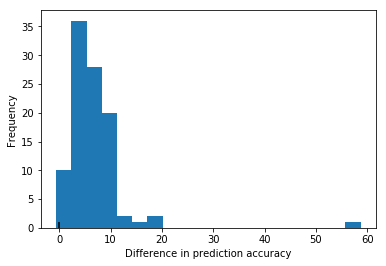

In [18]:
plt.clf()
fig =plt.figure()
ax =fig.add_subplot(111)
#density = gaussian_kde(delta)
#xs = np.linspace(-2,2,50)
#ax.plot(xs,density(xs))
ax.hist(kd-Skips_kd,20)
#ax.plot(np.linspace(-6,6,100),classifiers_test_scores[0],label ='POLY')
#ax.plot(np.linspace(-6,6,100),classifiers_test_scores[1],label='RBF')


ax.vlines(0,0,1)
ax.set_xlabel('Difference in prediction accuracy')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()
fig.savefig('ARCH_DeltaSKL.pdf')

In [13]:
np.mean(kd-Skips_kd)*100

-0.55049999999999988

In [9]:
kd

array([ 0.48175,  0.4535 ,  0.5495 ,  0.71025,  0.76775])

In [6]:
kd

array([ 0.48175,  0.66275,  0.773  ,  0.85375,  0.86475,  0.8545 ,
        0.8495 ,  0.77   ,  0.64225,  0.5025 ,  0.54525,  0.58225,
        0.74   ,  0.8065 ,  0.81425,  0.81   ,  0.7965 ,  0.7475 ,
        0.62525,  0.53325,  0.4535 ,  0.59625,  0.6945 ,  0.76025,
        0.79575,  0.78   ,  0.772  ,  0.6765 ,  0.558  ,  0.52775,
        0.60425,  0.51775,  0.6425 ,  0.71375,  0.7365 ,  0.713  ,
        0.706  ,  0.6535 ,  0.5465 ,  0.6535 ,  0.5495 ,  0.5205 ,
        0.5985 ,  0.659  ,  0.69625,  0.679  ,  0.6675 ,  0.586  ,
        0.49925,  0.64275,  0.661  ,  0.502  ,  0.52725,  0.57675,
        0.627  ,  0.604  ,  0.59725,  0.53725,  0.48425,  0.734  ,
        0.71025,  0.50925,  0.51775,  0.5495 ,  0.54625,  0.57075,
        0.5345 ,  0.503  ,  0.4965 ,  0.72425,  0.74425,  0.5395 ,
        0.50725,  0.507  ,  0.5285 ,  0.50725,  0.50775,  0.51825,
        0.47875,  0.77475,  0.76775,  0.588  ,  0.50775,  0.51125,
        0.504  ,  0.5005 ,  0.513  ,  0.48775,  0.5625 ,  0.77

In [7]:
Skips_kd

array([ 0.48475,  0.669  ,  0.807  ,  0.85625,  0.8875 ,  0.8695 ,
        0.846  ,  0.79925,  0.66275,  0.487  ,  0.51025,  0.60775,
        0.777  ,  0.83025,  0.83625,  0.85125,  0.82375,  0.7835 ,
        0.63325,  0.52   ,  0.50475,  0.587  ,  0.738  ,  0.794  ,
        0.8245 ,  0.799  ,  0.7585 ,  0.723  ,  0.59275,  0.509  ,
        0.542  ,  0.52875,  0.6885 ,  0.73775,  0.763  ,  0.78475,
        0.735  ,  0.68675,  0.54325,  0.5615 ,  0.59575,  0.52775,
        0.624  ,  0.6875 ,  0.72175,  0.698  ,  0.65375,  0.612  ,
        0.51475,  0.557  ,  0.63175,  0.48325,  0.55825,  0.6095 ,
        0.63425,  0.6425 ,  0.61   ,  0.544  ,  0.49375,  0.65725,
        0.724  ,  0.4915 ,  0.53775,  0.5525 ,  0.576  ,  0.57775,
        0.543  ,  0.52475,  0.48525,  0.65075,  0.725  ,  0.4985 ,
        0.4965 ,  0.51075,  0.52625,  0.543  ,  0.525  ,  0.493  ,
        0.482  ,  0.75125,  0.79975,  0.57975,  0.485  ,  0.489  ,
        0.49075,  0.50325,  0.51875,  0.504  ,  0.564  ,  0.77